In [13]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk import FreqDist
%notebook inline

In [4]:
df = pd.read_csv('fashion data.csv')
df.head(), df.shape

(   year   season            brand  author of review  location  \
 0   2016  Spring        A Dtacher  Kristin Anderson  NEW YORK   
 1   2016  Spring  A.F. Vandevorst       Luke Leitch     PARIS   
 2   2016  Spring           A.L.C.  Kristin Anderson  NEW YORK   
 3   2016  Spring           A.P.C.     Nicole Phelps     PARIS   
 4   2016  Spring       A.W.A.K.E.       Maya Singer  NEW YORK   
 
                   time                                        review text  
 0   September 13, 2015  Detachment was the word of the day at A Dtache...  
 1      October 1, 2015  You heard this collection coming long before y...  
 2   September 21, 2015  August saw the announcement of big news for A....  
 3      October 3, 2015  They call me the king of basics, Jean Touitou ...  
 4     October 21, 2015  Natalia Alaverdian is a designer with a lot of...  ,
 (434, 7))

In [5]:
reviews = df['review text']
len(reviews) # We have 434 reviews and continue on them to get some insightful knowledges.

434

## 1. Use a simple bag-of-words approach

In [8]:
list_tokens = []
for review in reviews:
    #print(review)
    tokens = [word for word in nltk.word_tokenize(review) if word.isalpha() ]
    list_tokens.append(tokens)

In [9]:
unclean_tokens = [] #Without remove stop words
for r in list_tokens:
    for w in r:
        unclean_tokens.append(w)

In [10]:
len(unclean_tokens)

119050

In [11]:
#Getting the frequency of the reviews data.
unclean_f = FreqDist(unclean_tokens)
sorted_unclean_f = sorted(unclean_f.items(),key = lambda k: k[1], reverse = True)
sorted_unclean_f
result1 = pd.DataFrame(sorted_unclean_f,columns=['Word','Frequency']).iloc[:30,:]
result1

,Word,Frequency
0,the,5780
1,a,4027
2,of,3590
3,and,3553
4,to,2501
5,in,2234
6,with,1540
7,that,1471
8,was,1406
9,on,998


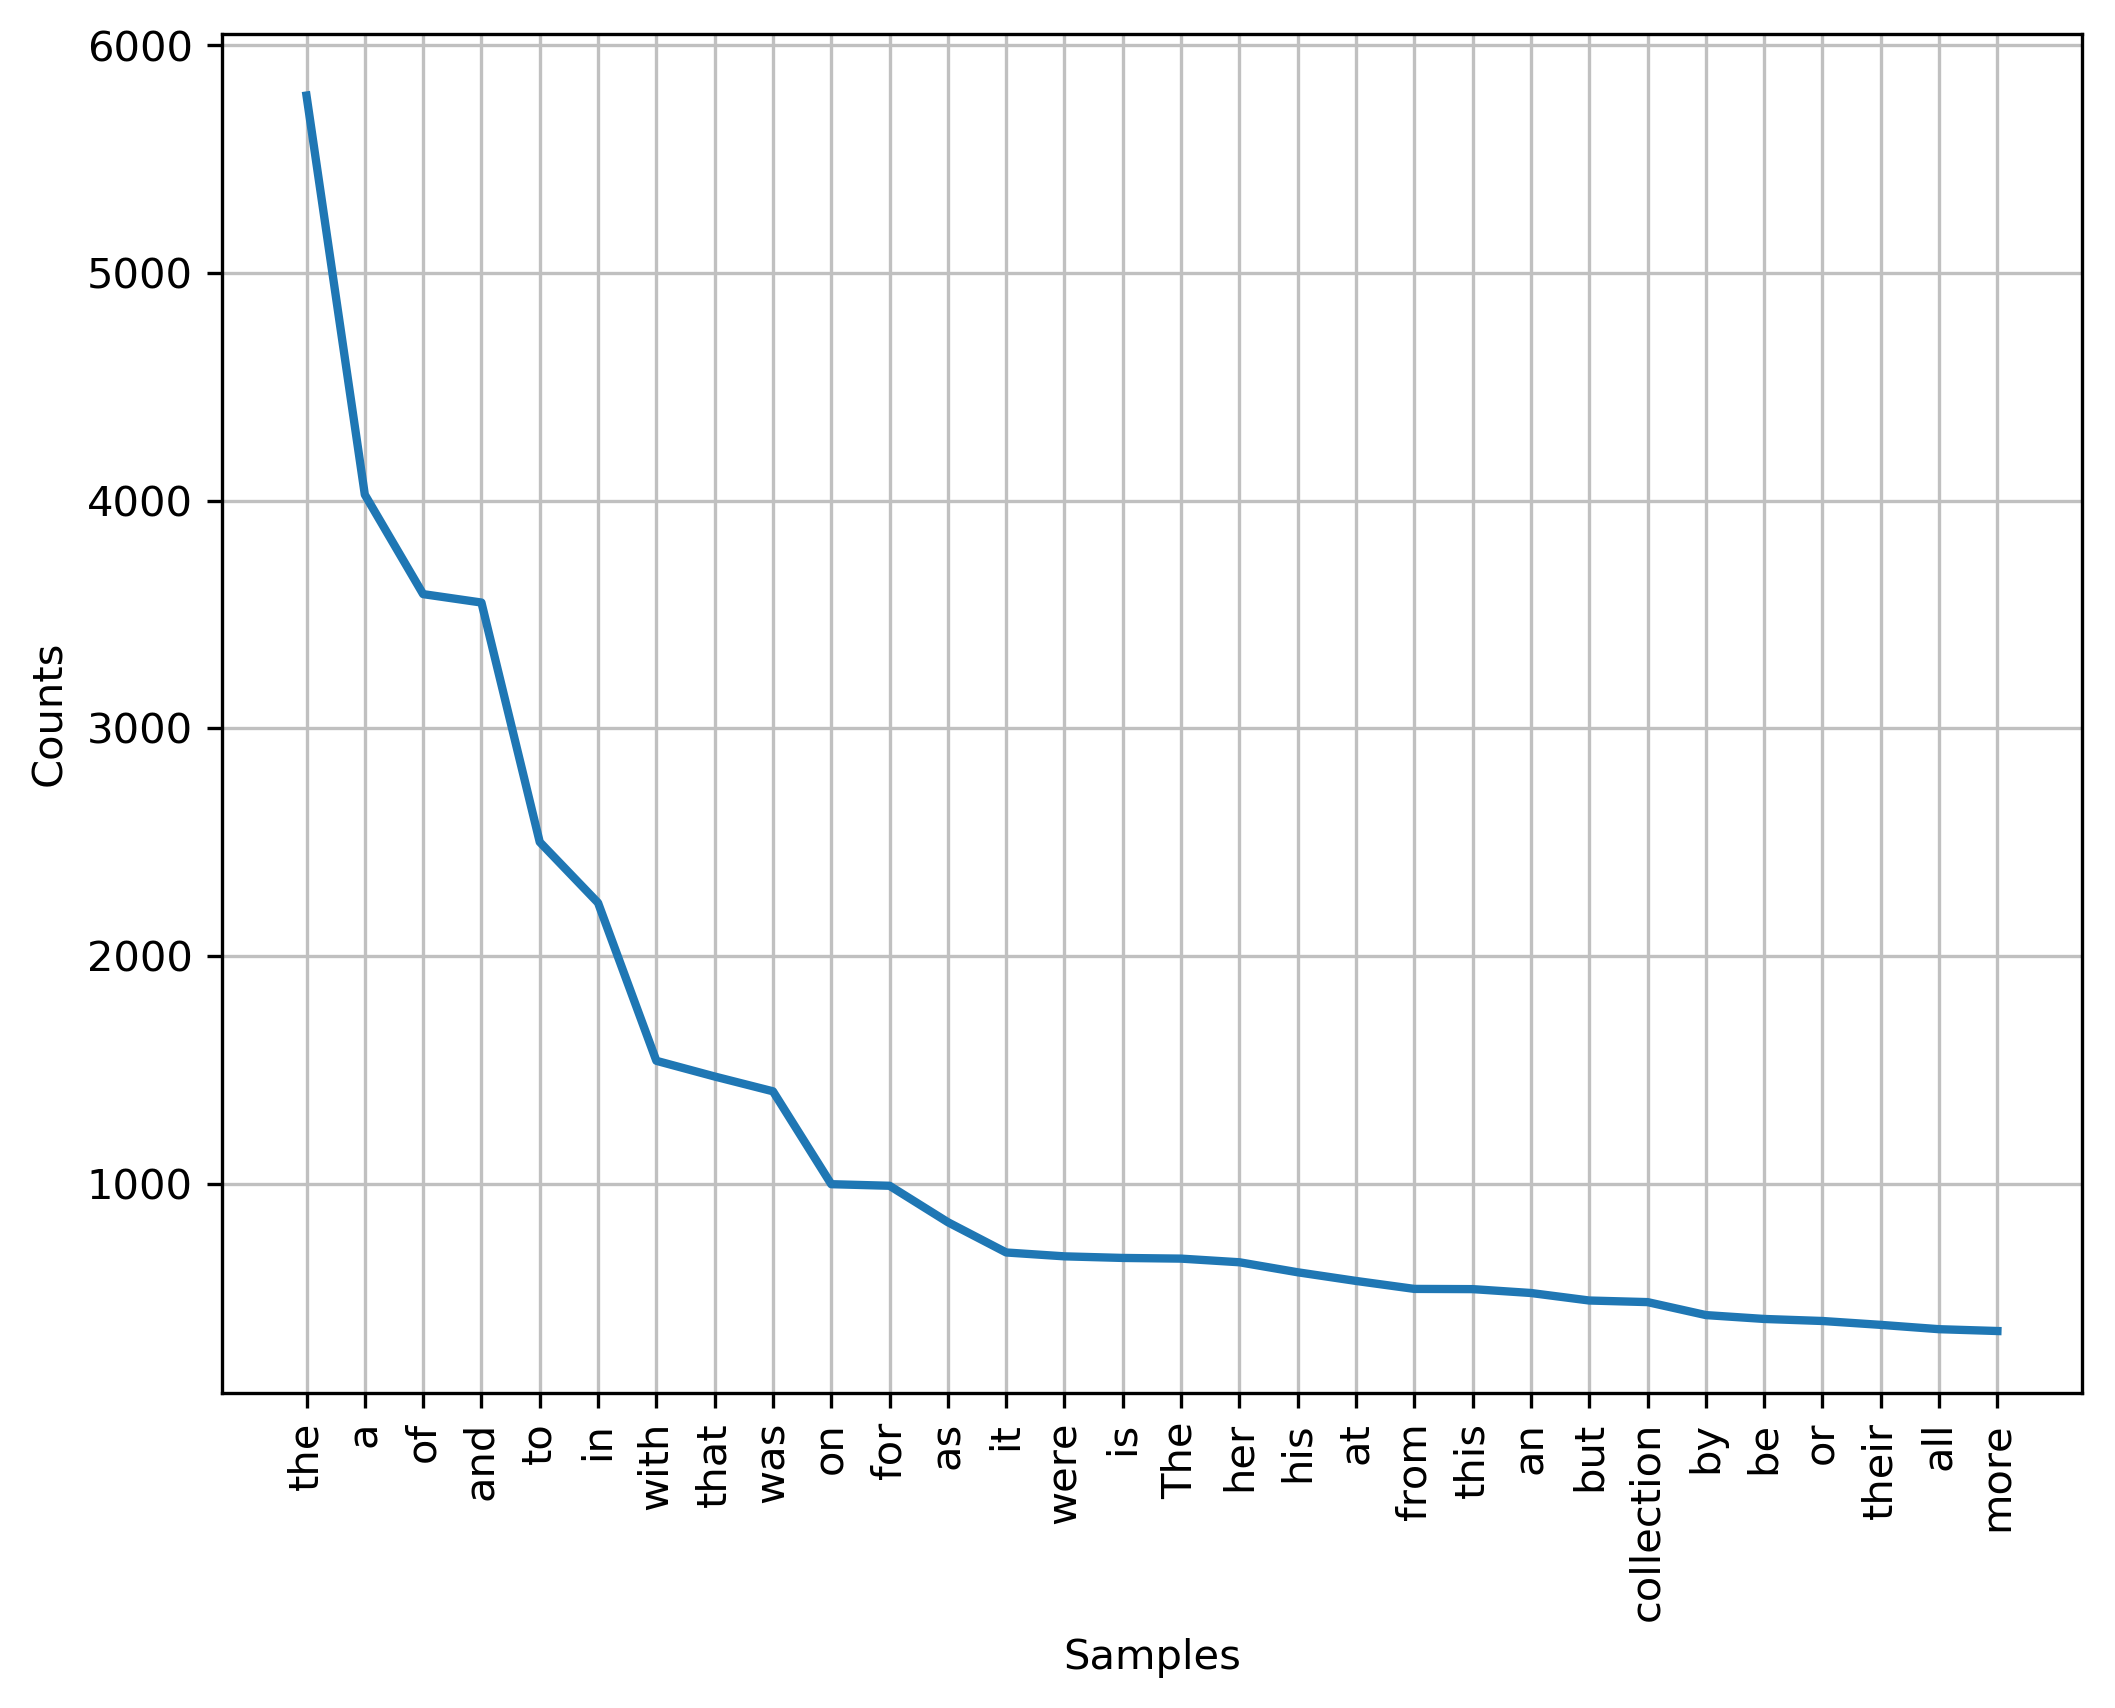

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
unclean_f.plot(30)
plt.show()

## 2. Use a bag-of-words approach with stemming and stop words removal 

In [32]:
words = [token for token in unclean_tokens if token.lower() not in stopwords.words('english')]# have remove the stopwords

In [33]:
len(words)# Here are how many data we leave after 

67867

In [34]:
#Getting the frequency of the reviews data.
words_f = FreqDist(words)
sorted_words_f = sorted(words_f.items(),key = lambda k: k[1], reverse = True)
result2 = pd.DataFrame(sorted_words_f,columns=['Word','Frequency']).iloc[:30,:]
result2

,Word,Frequency
0,collection,480
1,dresses,322
2,like,304
3,one,303
4,show,295
5,dress,281
6,new,248
7,designer,229
8,clothes,225
9,said,221


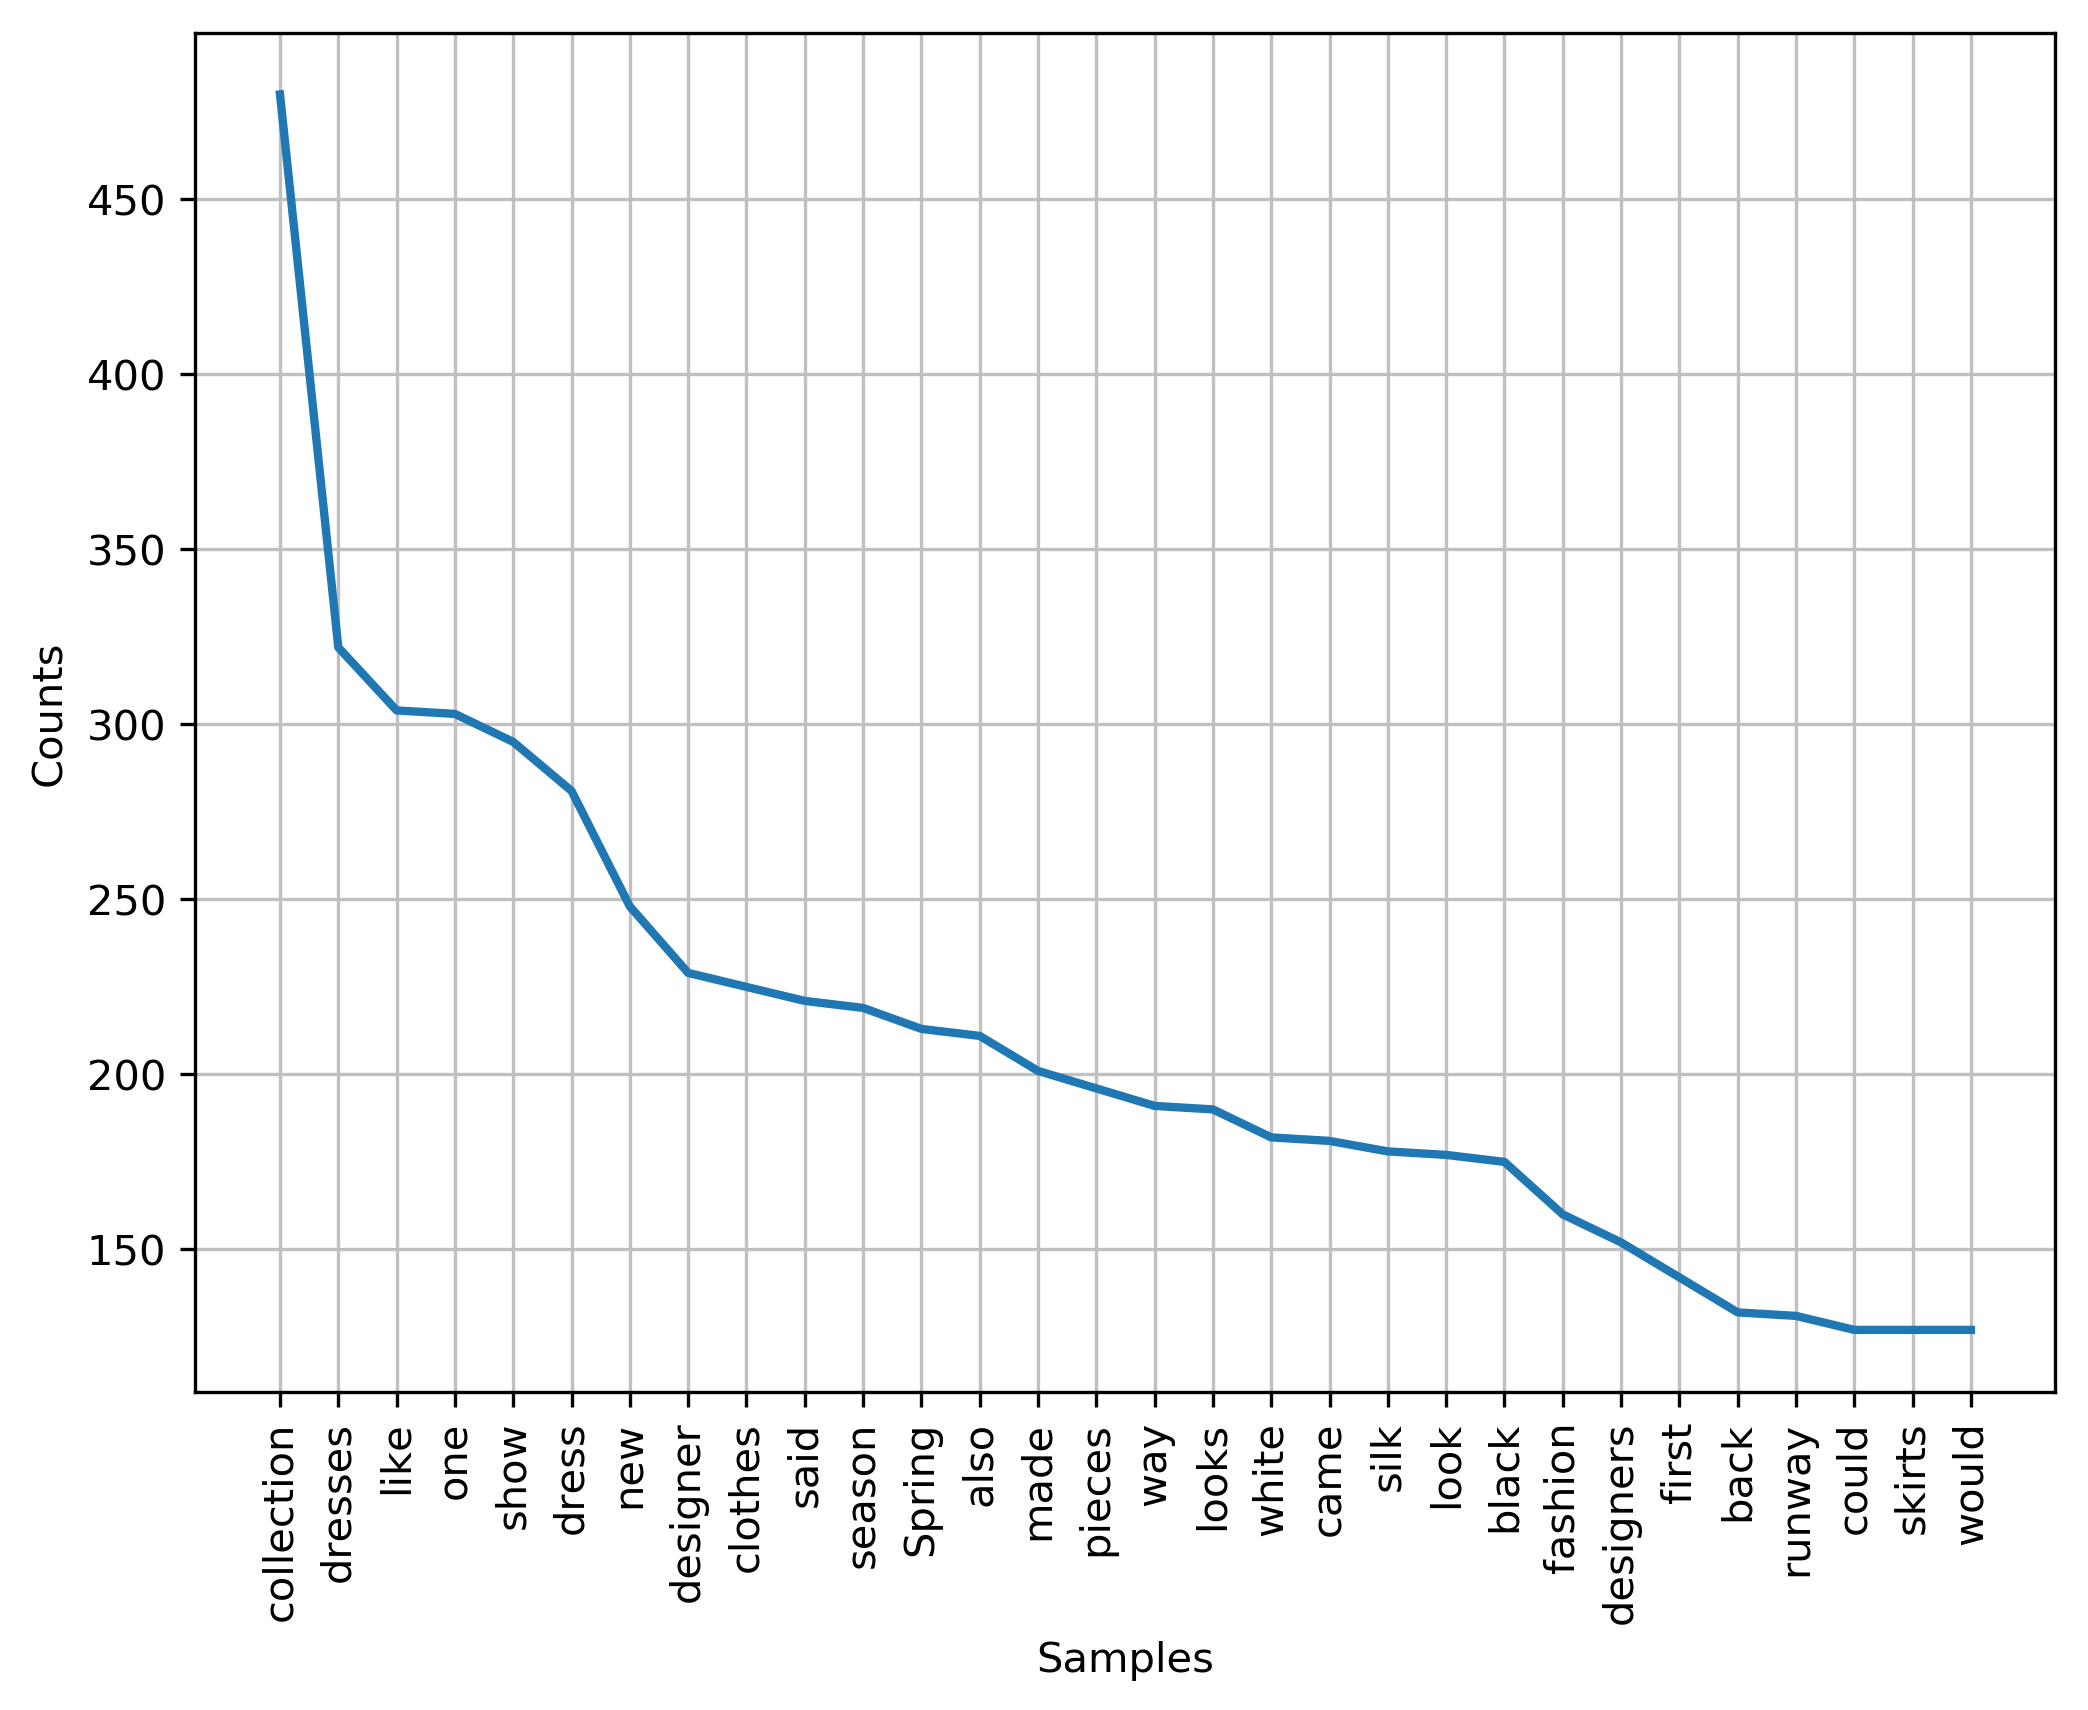

In [36]:
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
words_f.plot(30)
plt.show()

### 1. Porter

In [37]:
#Use Porter Stemmer 
porter = nltk.PorterStemmer()
porter_result = [porter.stem(w) for w in words]
#Get the frequency distribution 
porter_f = FreqDist(porter_result)
#Sort the result
sorted_porter = sorted(porter_f.items(),key = lambda k: k[1], reverse = True)
result2_1 = pd.DataFrame(sorted_porter,columns=['Word','Frequency']).iloc[:30,:]
result2_1

,Word,Frequency
0,dress,660
1,collect,601
2,design,499
3,look,492
4,show,431
5,one,393
6,new,364
7,like,360
8,season,293
9,print,278


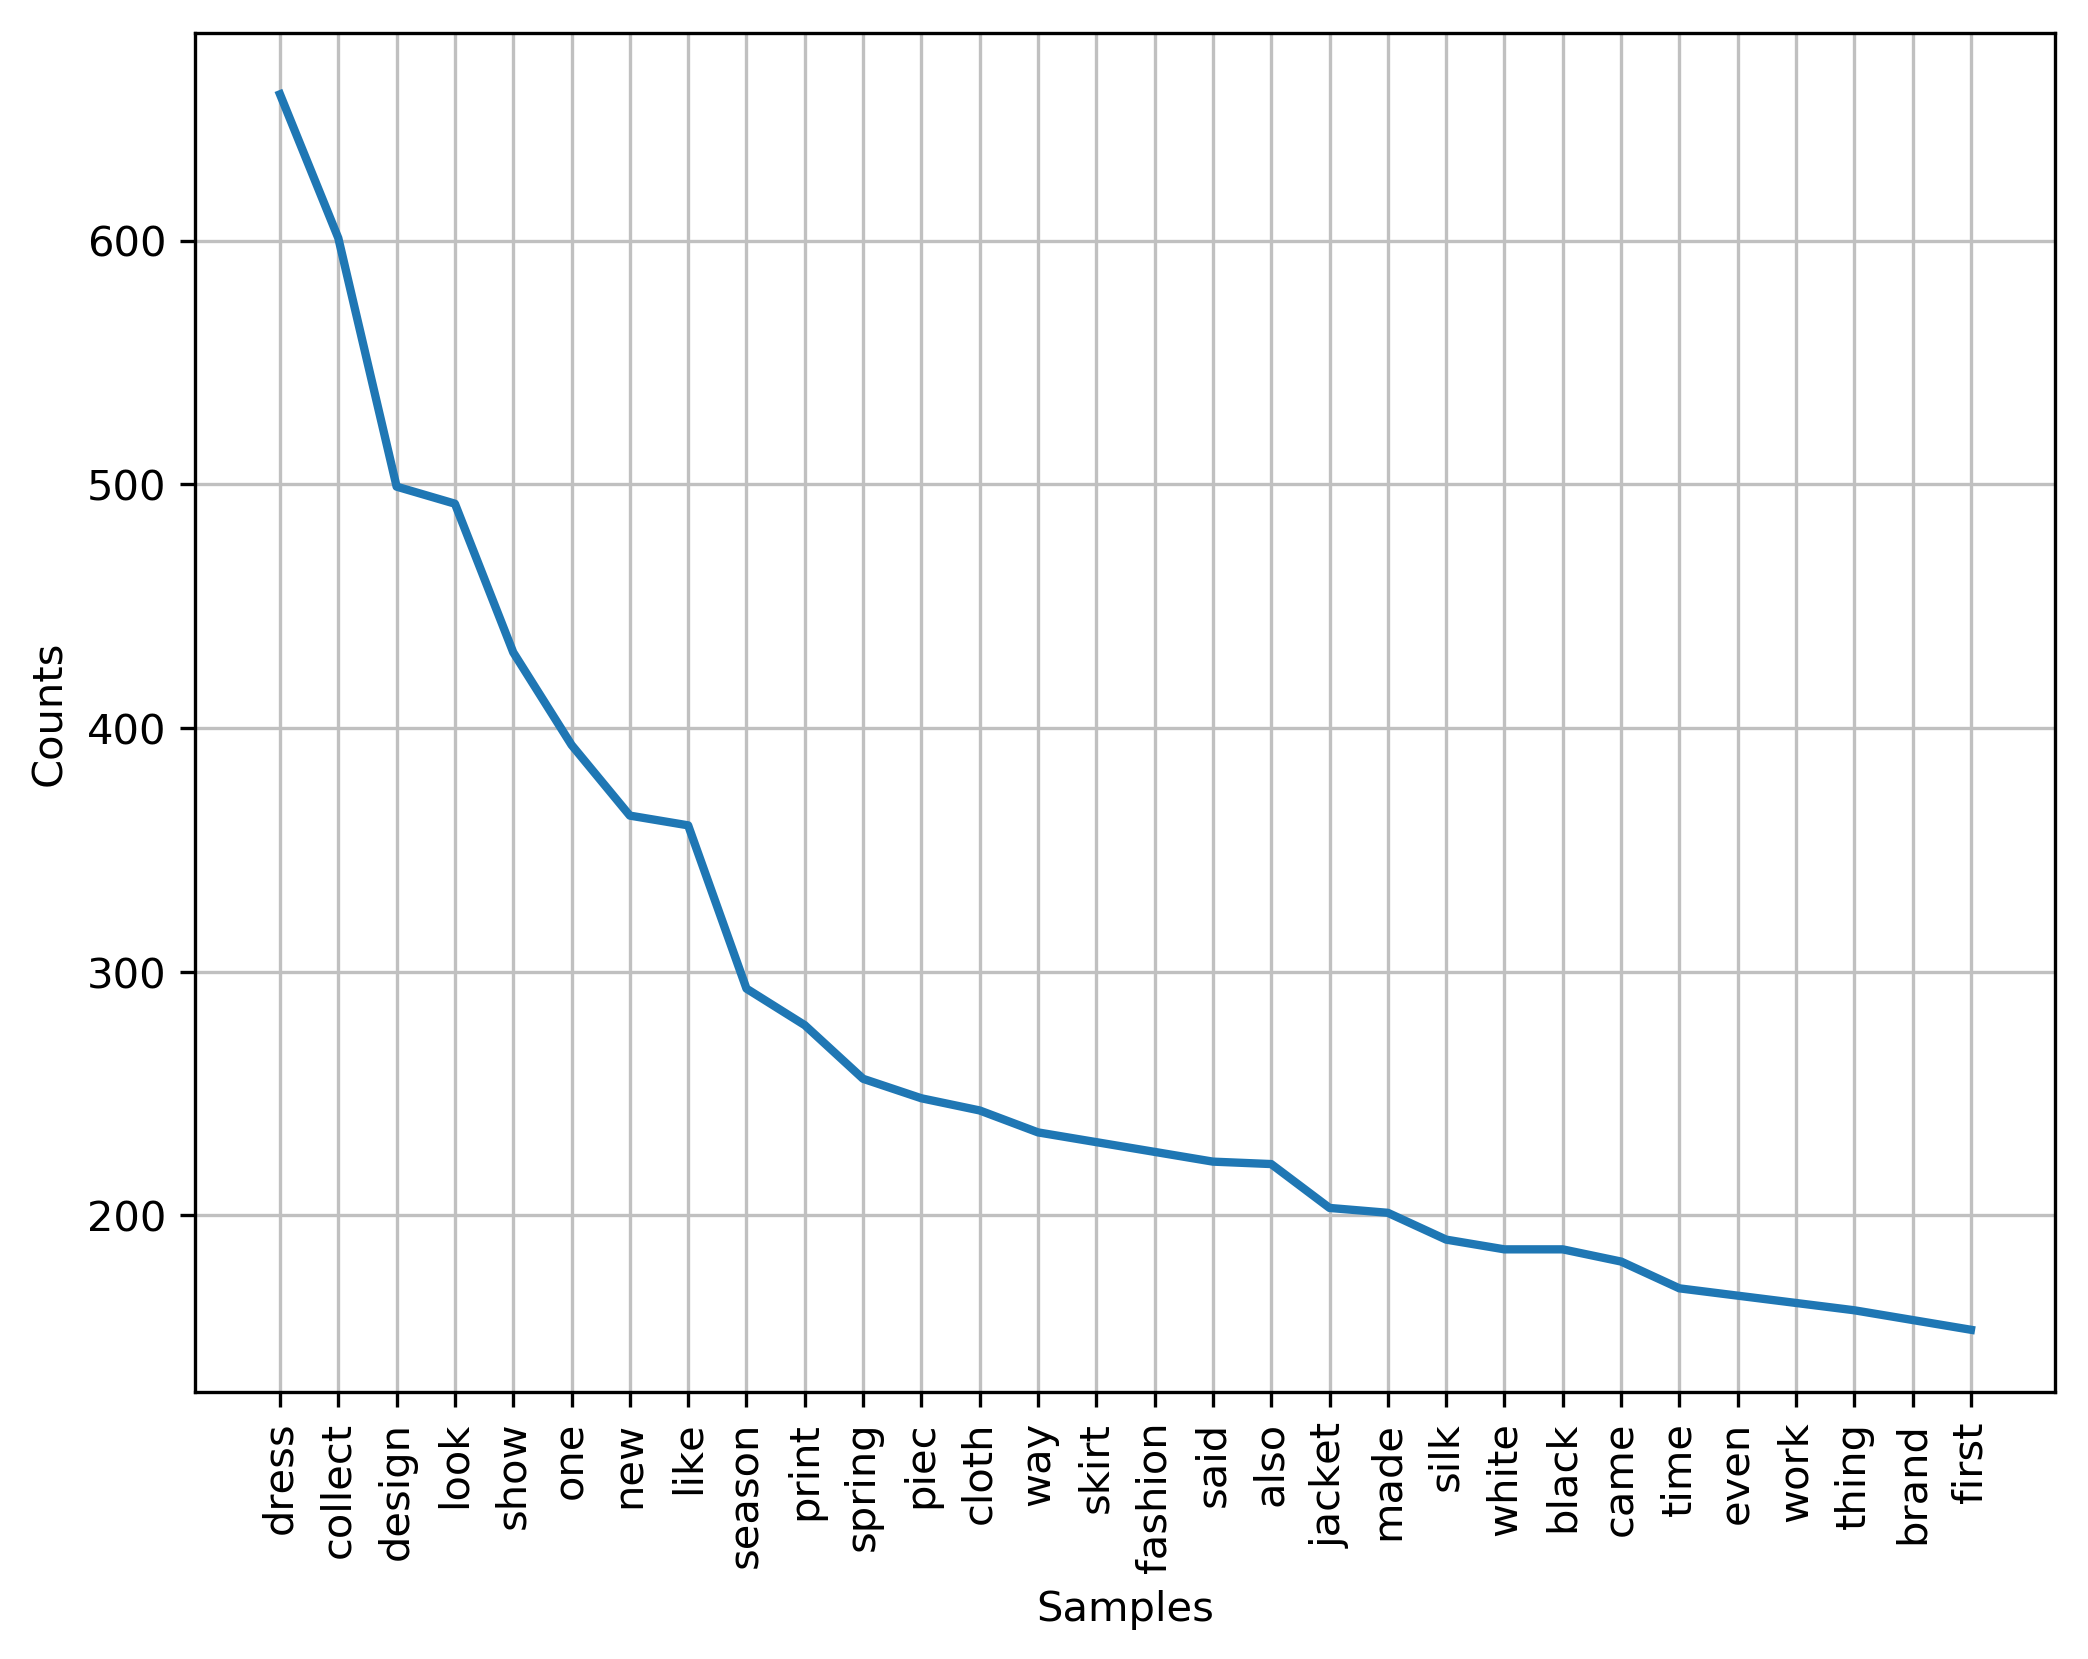

In [38]:
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
porter_f.plot(30)
plt.show()

### 2.Lancaster Stemmer

In [39]:
#Steps are the same with the Porter Stemmer
lancaster= nltk.LancasterStemmer() #initializing stemmer
lan_result = [lancaster.stem(w) for w in words] #use the stemmer
print(len(lan_result))
#stem2 = [w for w in stem2]
lan_f = FreqDist(lan_result)
sorted_lan = sorted(lan_f.items(),key = lambda k: k[1], reverse = True)
sorted_unclean_f
result2_2 = pd.DataFrame(sorted_lan,columns=['Word','Frequency']).iloc[:30,:]
result2_2

67867


,Word,Frequency
0,dress,662
1,collect,603
2,design,499
3,look,493
4,show,432
5,on,394
6,new,384
7,lik,361
8,season,295
9,print,282


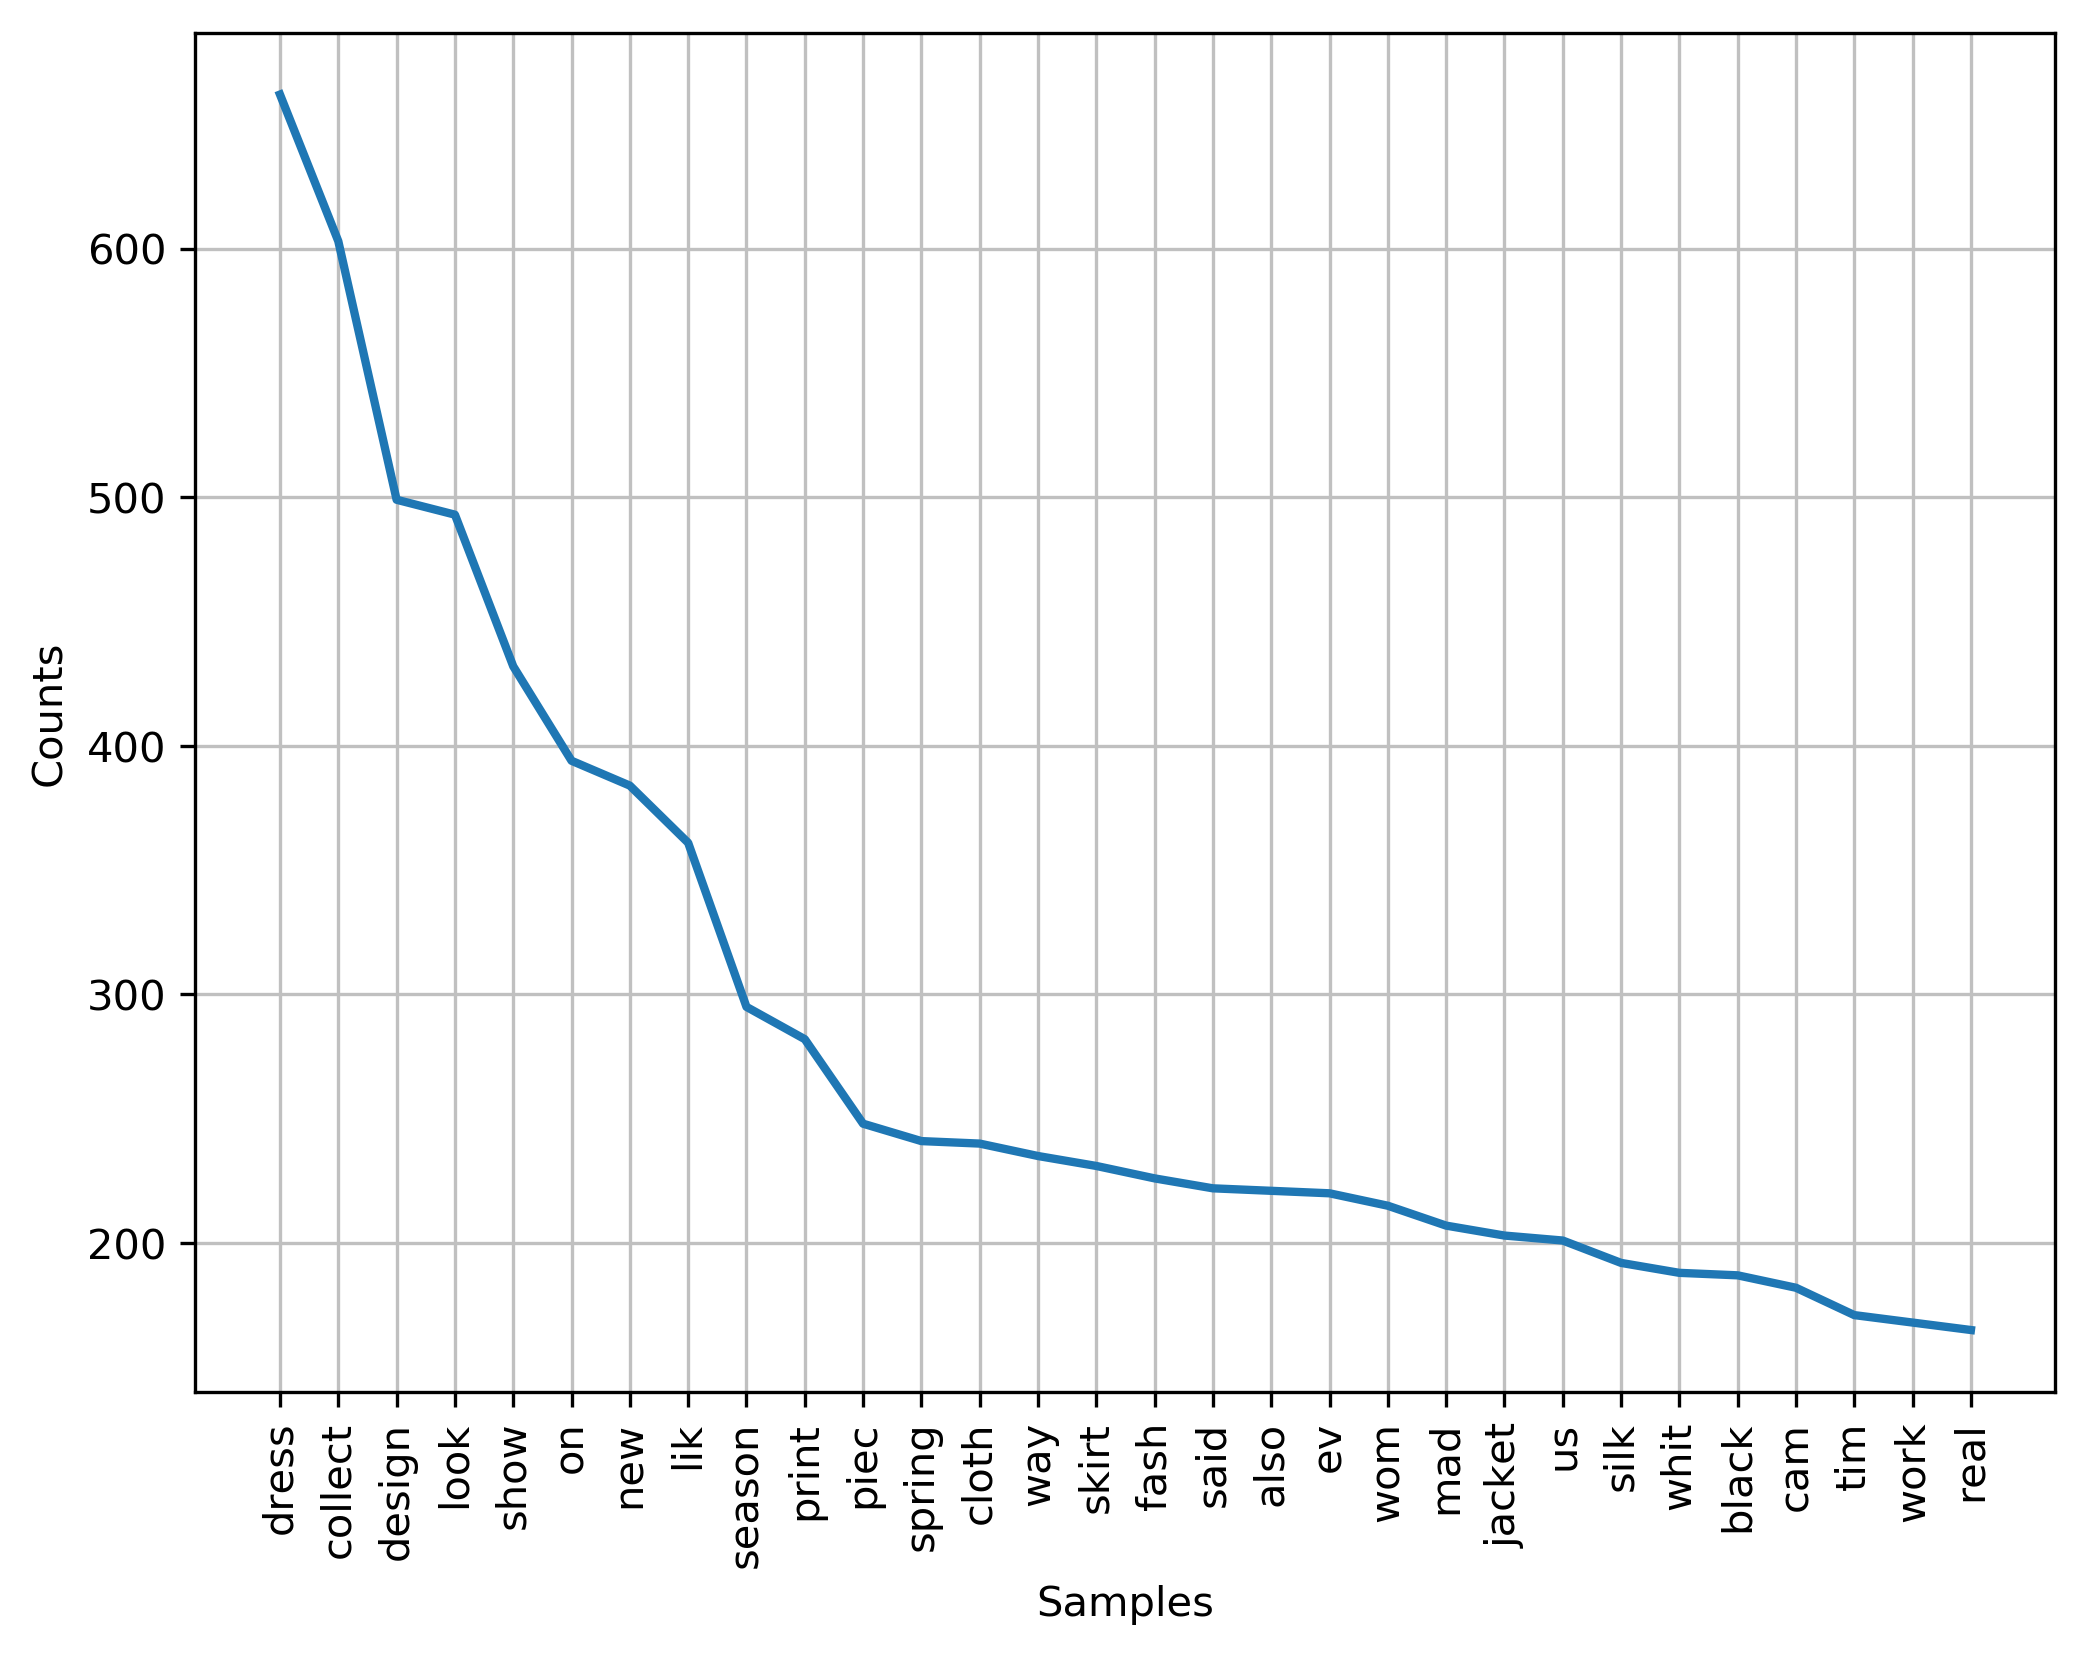

In [40]:
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
lan_f.plot(30)
plt.show()

### 3. WordNet Lemmatizer

In [41]:
#Steps are the same with the previous two stemmers 
wnl = nltk.WordNetLemmatizer()
wnl_result = [wnl.lemmatize(w) for w in words]
print(len(wnl_result))
wnl_f = FreqDist(wnl_result)
sorted_wnl = sorted(wnl_f.items(),key = lambda k: k[1], reverse = True)
result2_3 = pd.DataFrame(sorted_wnl,columns=['Word','Frequency']).iloc[:30,:]
result2_3

67867


,Word,Frequency
0,dress,604
1,collection,576
2,designer,381
3,look,367
4,show,359
5,one,342
6,like,317
7,season,282
8,new,248
9,piece,238


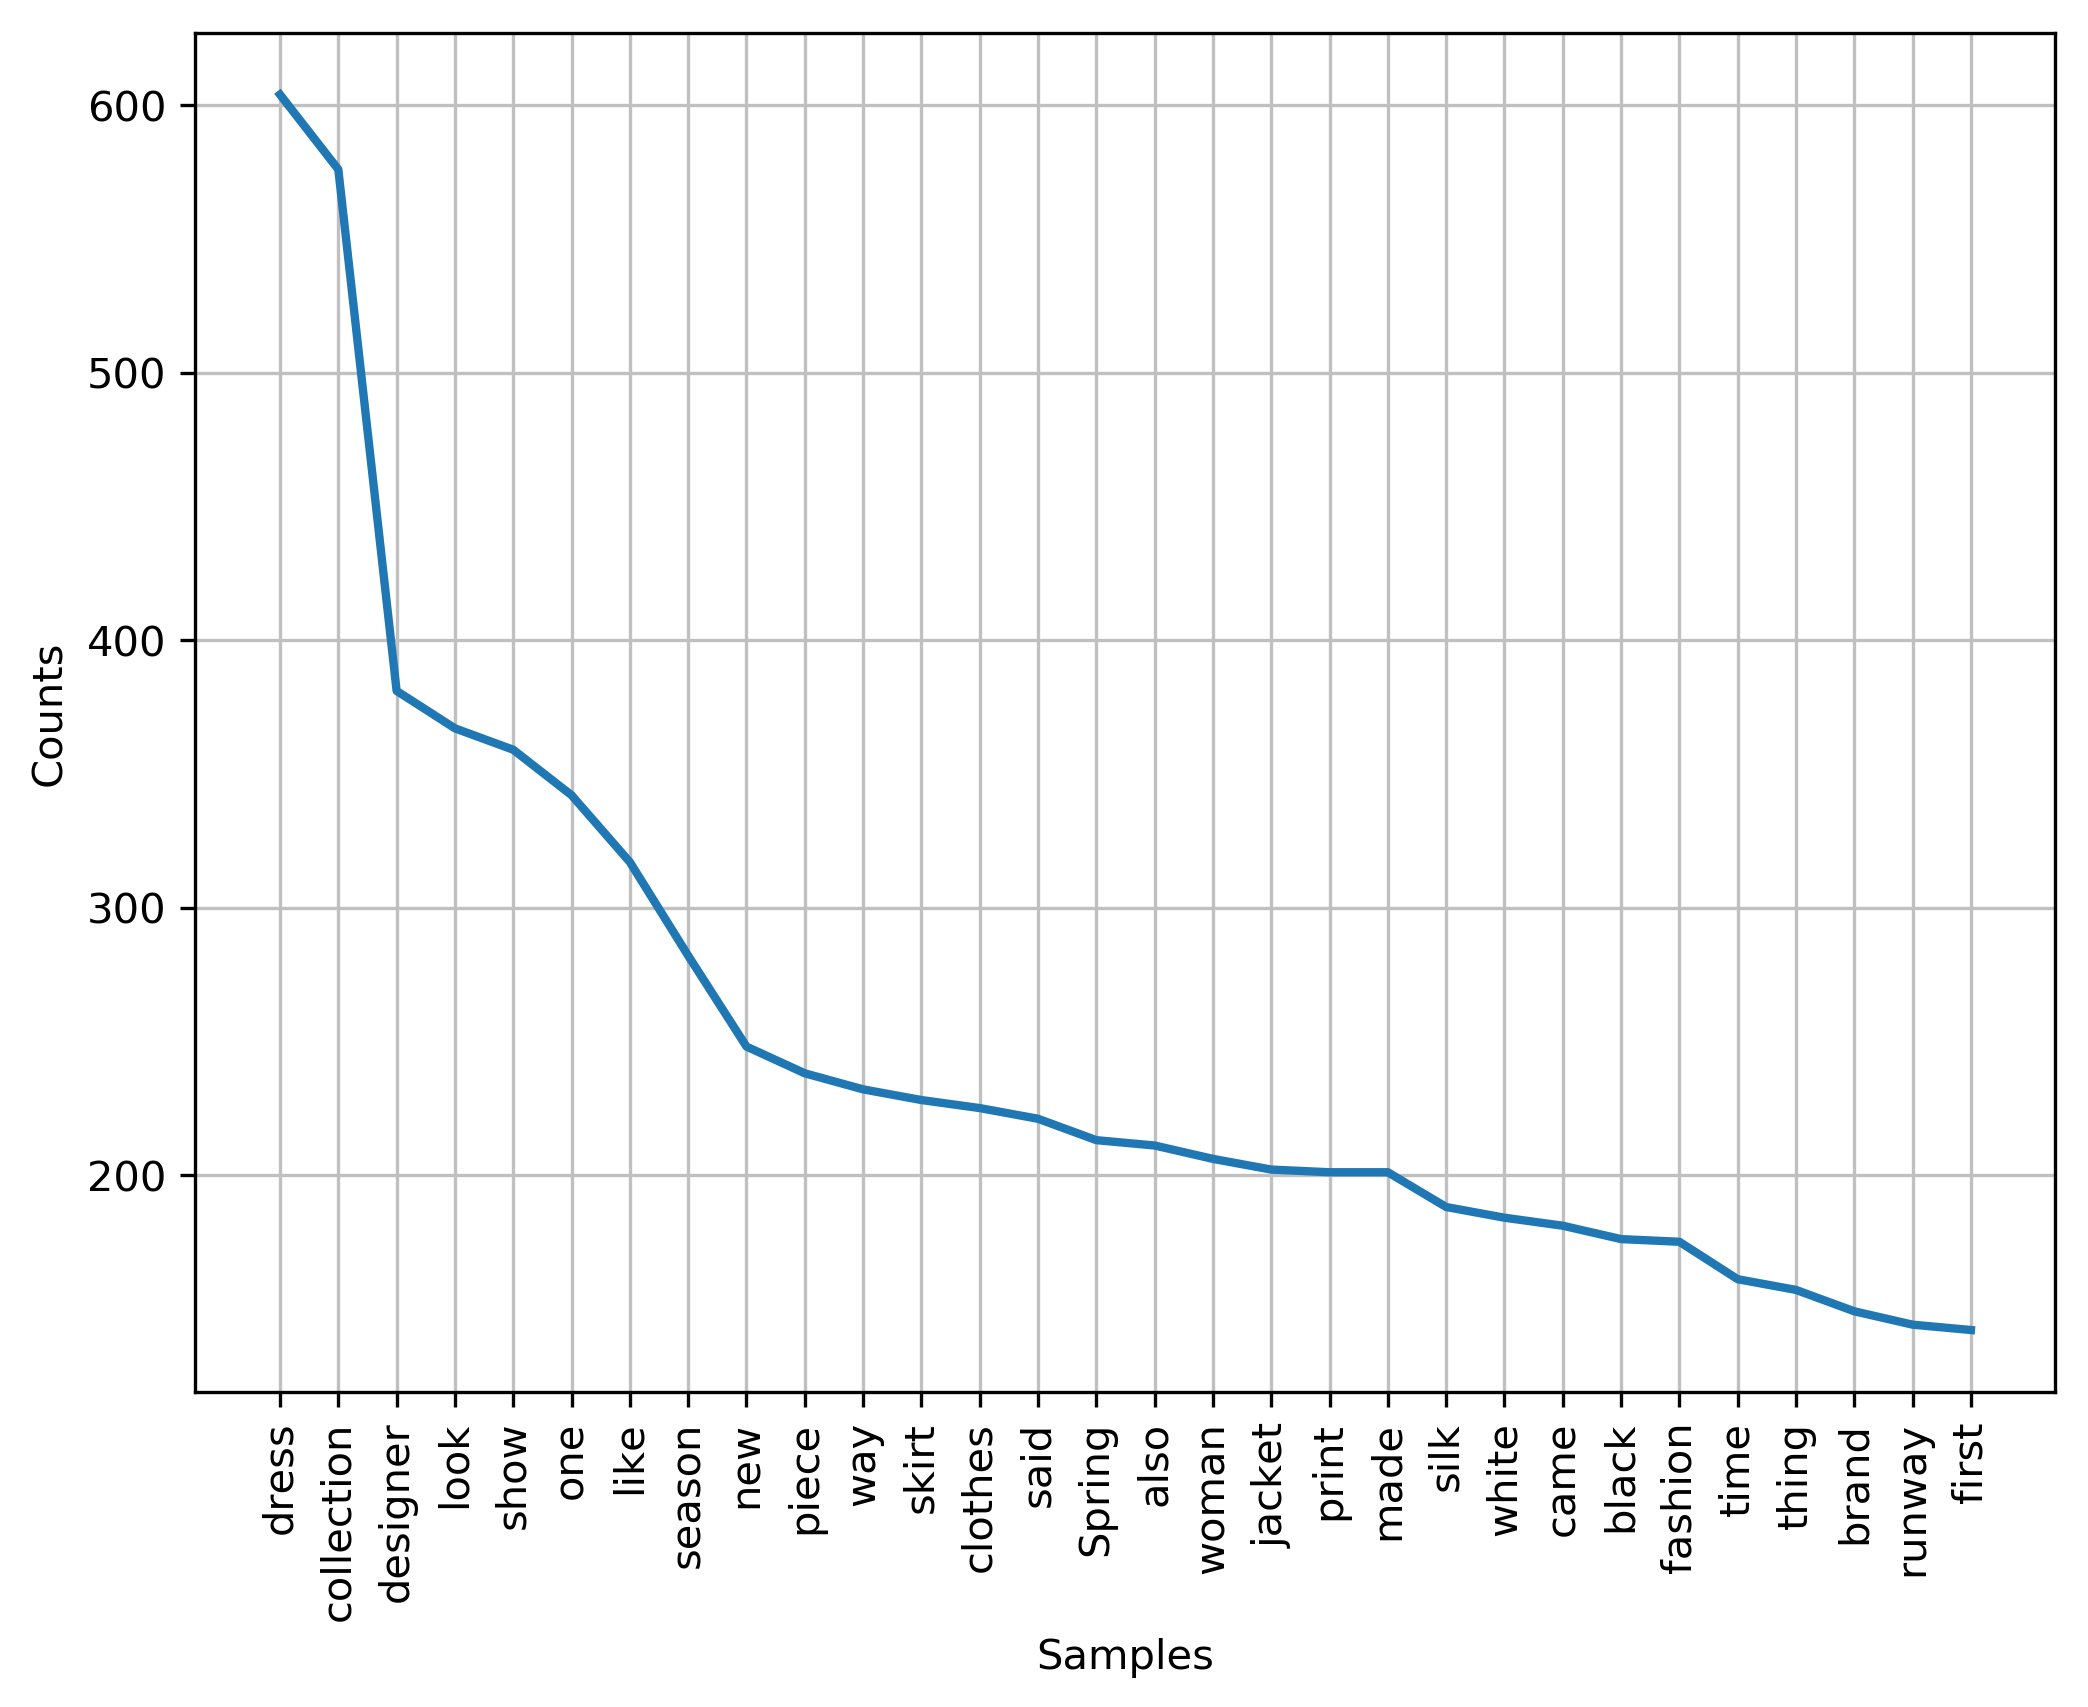

In [42]:
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
wnl_f.plot(30)
plt.show()

# 3.Use POS approach and focus on all the noun forms (NN, NNP, NNS, NNPS)

In [43]:
#Generate a list of POS tags
POS_tags = nltk.pos_tag(unclean_tokens) #use unprocessed 'tokens', not 'words'
print(len(POS_tags))
#Keep tags that start with 'N'
POS_tag_listN = [(word,tag) for (word,tag) in POS_tags if tag.startswith('N')]
POS_tag_listN


119050


[('Detachment', 'NN'),
 ('word', 'NN'),
 ('day', 'NN'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('yes', 'NN'),
 ('labels', 'NNS'),
 ('sr', 'NN'),
 ('Designer', 'NNP'),
 ('Mona', 'NNP'),
 ('Kowalska', 'NNP'),
 ('concept', 'NN'),
 ('imagines', 'NNS'),
 ('today', 'NN'),
 ('detachment', 'NN'),
 ('gaze', 'NN'),
 ('others', 'NNS'),
 ('Kowalskas', 'NNP'),
 ('woman', 'NN'),
 ('runway', 'NN'),
 ('world', 'NN'),
 ('Her', 'NNP'),
 ('bend', 'NN'),
 ('taste', 'NN'),
 ('clothes', 'NNS'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('brand', 'NN'),
 ('shoppers', 'NNS'),
 ('season', 'NN'),
 ('Kowalska', 'NNP'),
 ('lineup', 'NN'),
 ('offerings', 'NNS'),
 ('collection', 'NN'),
 ('pair', 'NN'),
 ('midi', 'NN'),
 ('dresses', 'NNS'),
 ('print', 'NN'),
 ('Pop', 'NNP'),
 ('polka', 'NN'),
 ('dots', 'NNS'),
 ('cardigans', 'NNS'),
 ('kind', 'NN'),
 ('amoxicillin', 'NN'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('woman', 'NN'),
 ('tongue', 'NN'),
 ('firmly', 'NN'),
 ('cheek', 'NN'),
 ('allover', 'NN'),
 ('holes', 'NNS'),
 ('

In [44]:
#Generate a frequency distribution 
Ntag_f = nltk.FreqDist(POS_tag_listN)
print(Ntag_f)
sorted_Ntag = sorted(Ntag_f.items(), key = lambda k:k[1], reverse = True)
result3 = pd.DataFrame(sorted_Ntag,columns=['Word','Frequency']).iloc[:30,:]
result3

<FreqDist with 10479 samples and 37576 outcomes>


,Word,Frequency
0,"(collection, NN)",479
1,"(dress, NN)",267
2,"(dresses, NNS)",263
3,"(show, NN)",240
4,"(designer, NN)",228
5,"(clothes, NNS)",223
6,"(season, NN)",219
7,"(way, NN)",191
8,"(pieces, NNS)",191
9,"(silk, NN)",164


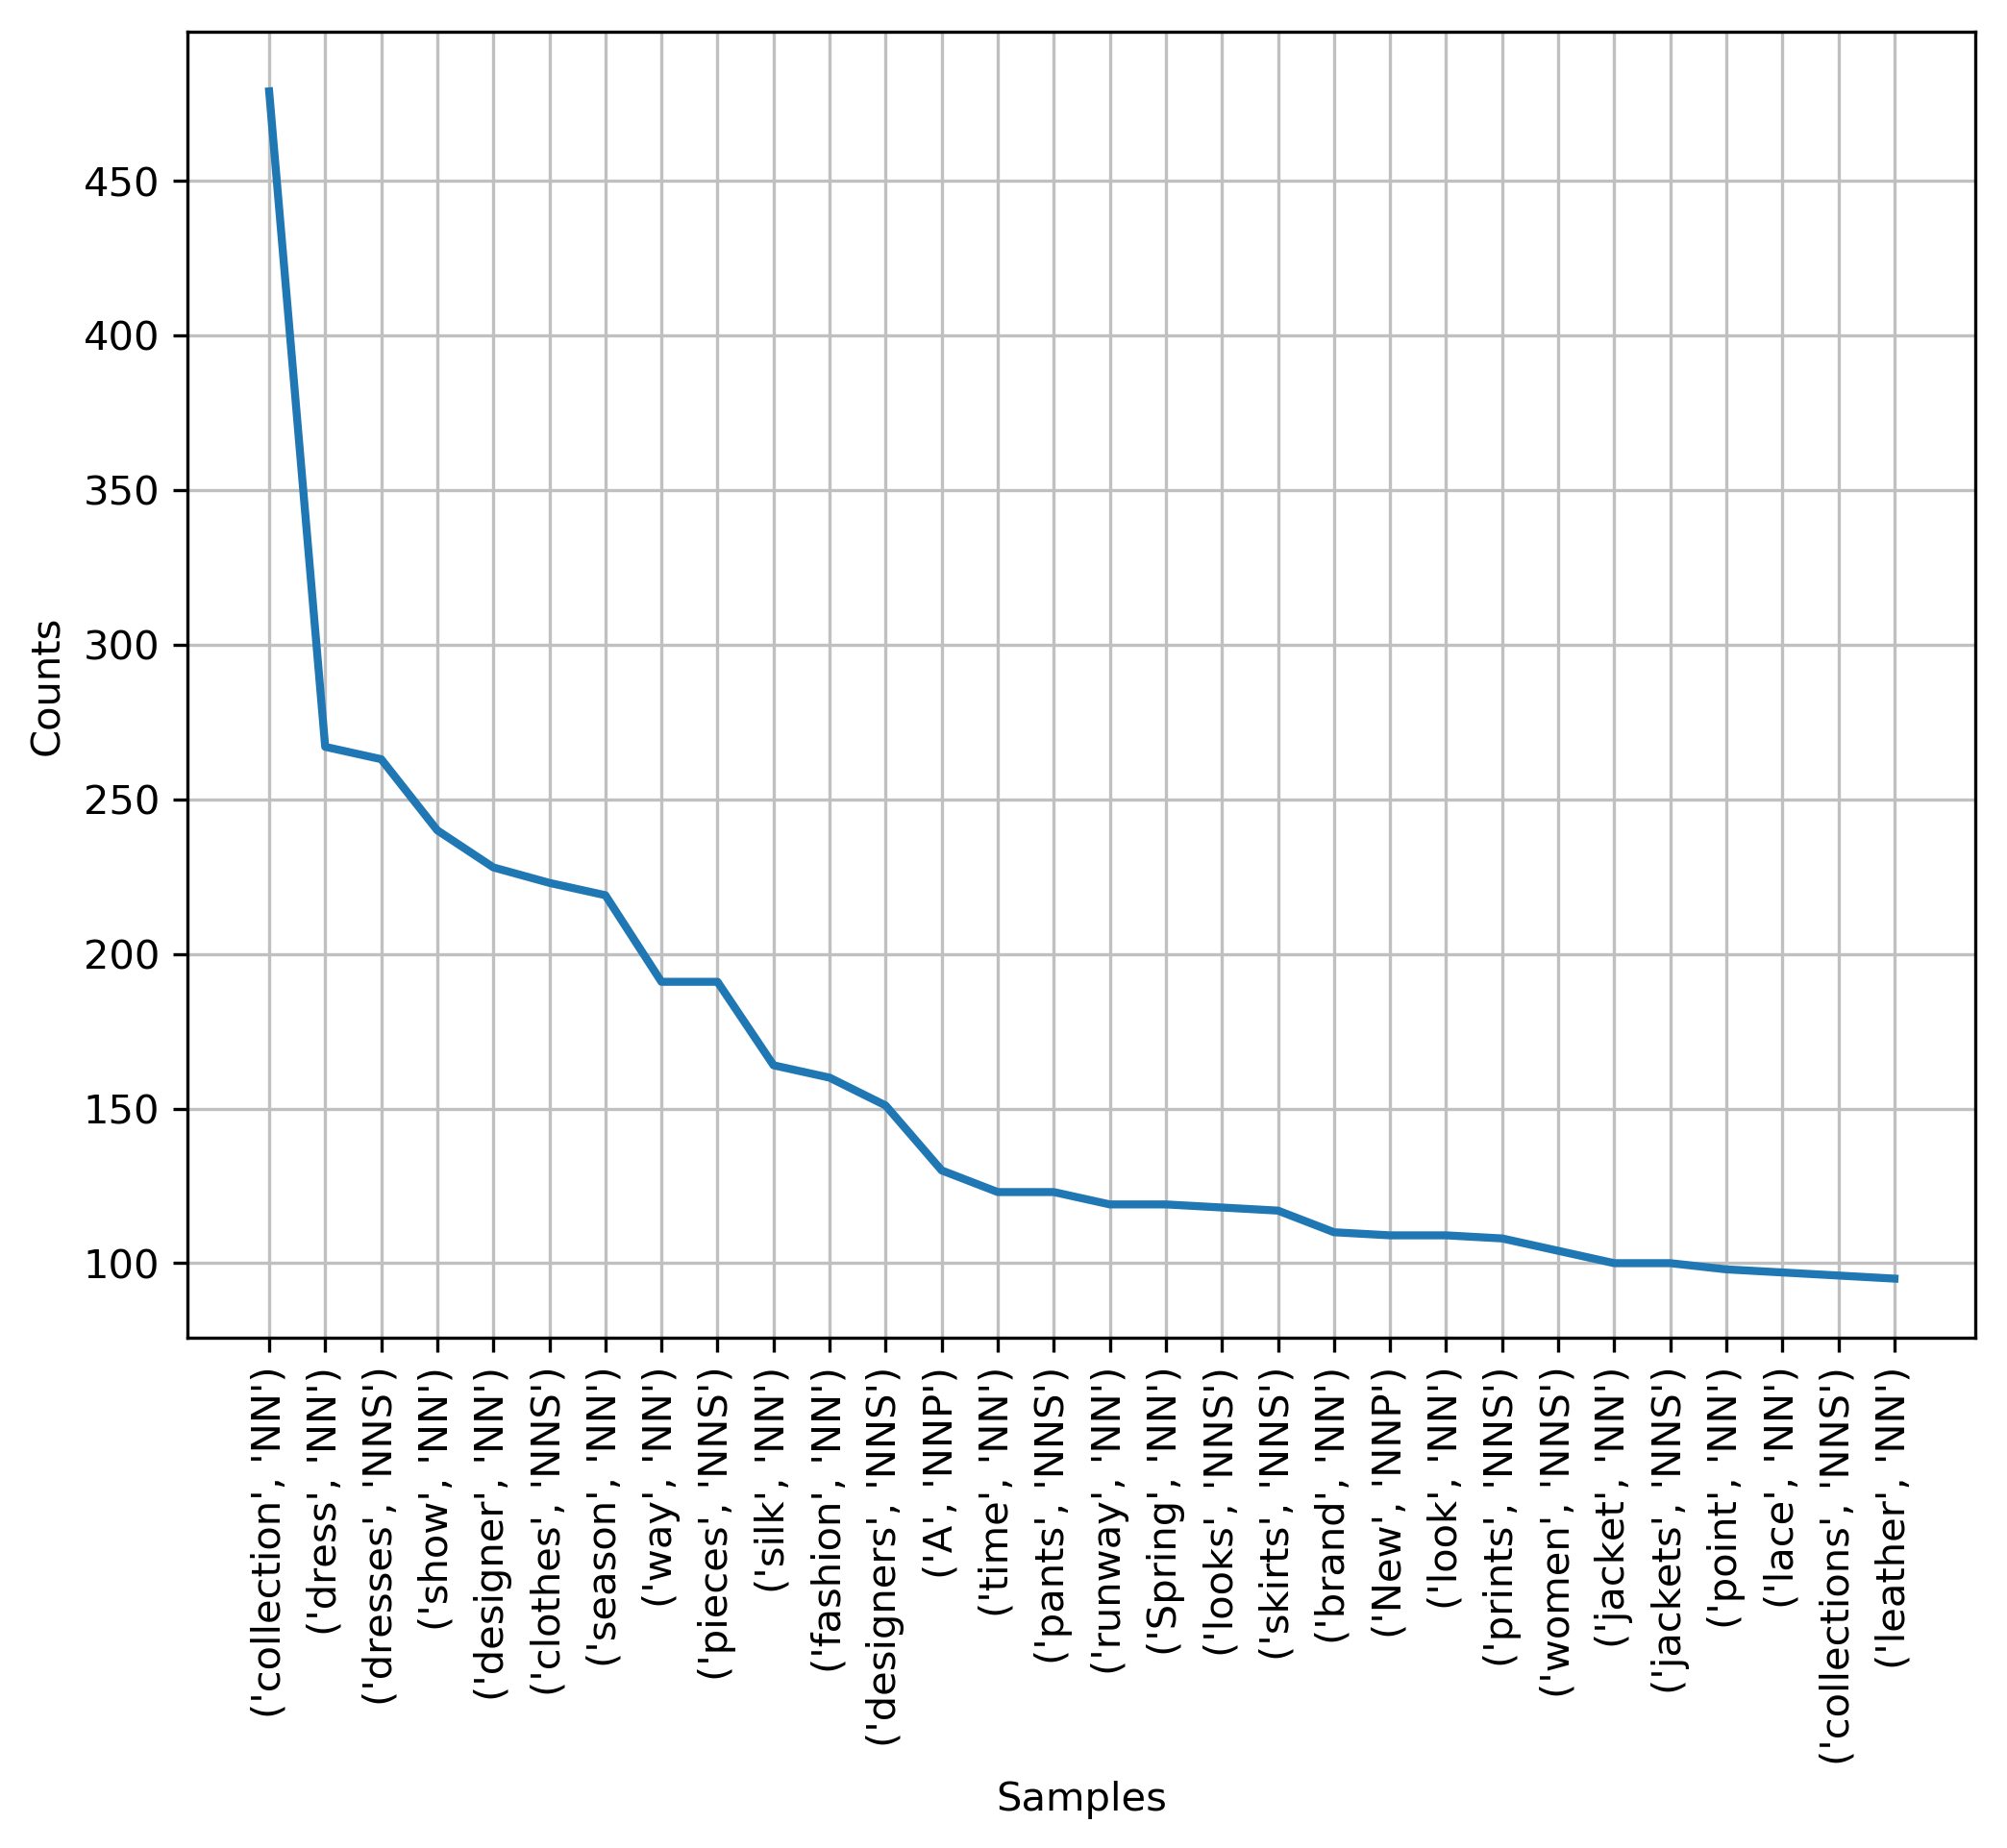

In [45]:
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
Ntag_f.plot(30)
plt.show()

# 4.Use POS approach and only focus on NNP 

In [46]:
len(POS_tags)

119050

In [47]:
#Keep tags that start with 'N'
POS_tag_listNNP = [(word, tag) for (word, tag) in POS_tags if tag.startswith('NNP')]
POS_tag_listNNP

[('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Designer', 'NNP'),
 ('Mona', 'NNP'),
 ('Kowalska', 'NNP'),
 ('Kowalskas', 'NNP'),
 ('Her', 'NNP'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Kowalska', 'NNP'),
 ('Pop', 'NNP'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Kowalskas', 'NNP'),
 ('Spring', 'NNP'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Facult', 'NNP'),
 ('Mdecine', 'NNP'),
 ('Paris', 'NNP'),
 ('Triumphs', 'NNP'),
 ('Vandevorst', 'NNP'),
 ('East', 'NNP'),
 ('West', 'NNP'),
 ('Hence', 'NNP'),
 ('Antwerp', 'NNP'),
 ('Vandevorst', 'NNP'),
 ('Crocheted', 'NNP'),
 ('Road', 'NNP'),
 ('August', 'NNP'),
 ('InterLuxe', 'NNP'),
 ('Jason', 'NNP'),
 ('Wu', 'NNP'),
 ('Andrea', 'NNP'),
 ('Lieberman', 'NNP'),
 ('Berber', 'NNP'),
 ('Lieberman', 'NNP'),
 ('A', 'NNP'),
 ('Lieberman', 'NNP'),
 ('Lieberman', 'NNP'),
 ('Jean', 'NNP'),
 ('Touitou', 'NNP'),
 ('APC', 'NNP'),
 ('Kingliness', 'NNP'),
 ('Touitou', 'NNP'),
 ('APC', 'NNP'),
 ('Past', 'NNP'),
 ('LBD', 'NNP'),
 ('Touitou', 'NNP'),
 ('A', 'NNP'),
 ('A', 'NNP

In [48]:
#Generate a frequency distribution 
NNPtag_f = nltk.FreqDist(POS_tag_listNNP)
sorted_NNPtag = sorted(NNPtag_f.items(), key = lambda k:k[1], reverse = True)
result4 = pd.DataFrame(sorted_NNPtag,columns=['Word','Frequency']).iloc[:30,:]
result4

,Word,Frequency
0,"(A, NNP)",130
1,"(New, NNP)",109
2,"(York, NNP)",88
3,"(Spring, NNP)",73
4,"(Fashion, NNP)",44
5,"(London, NNP)",43
6,"(Paris, NNP)",37
7,"(West, NNP)",25
8,"(City, NNP)",22
9,"(Her, NNP)",21


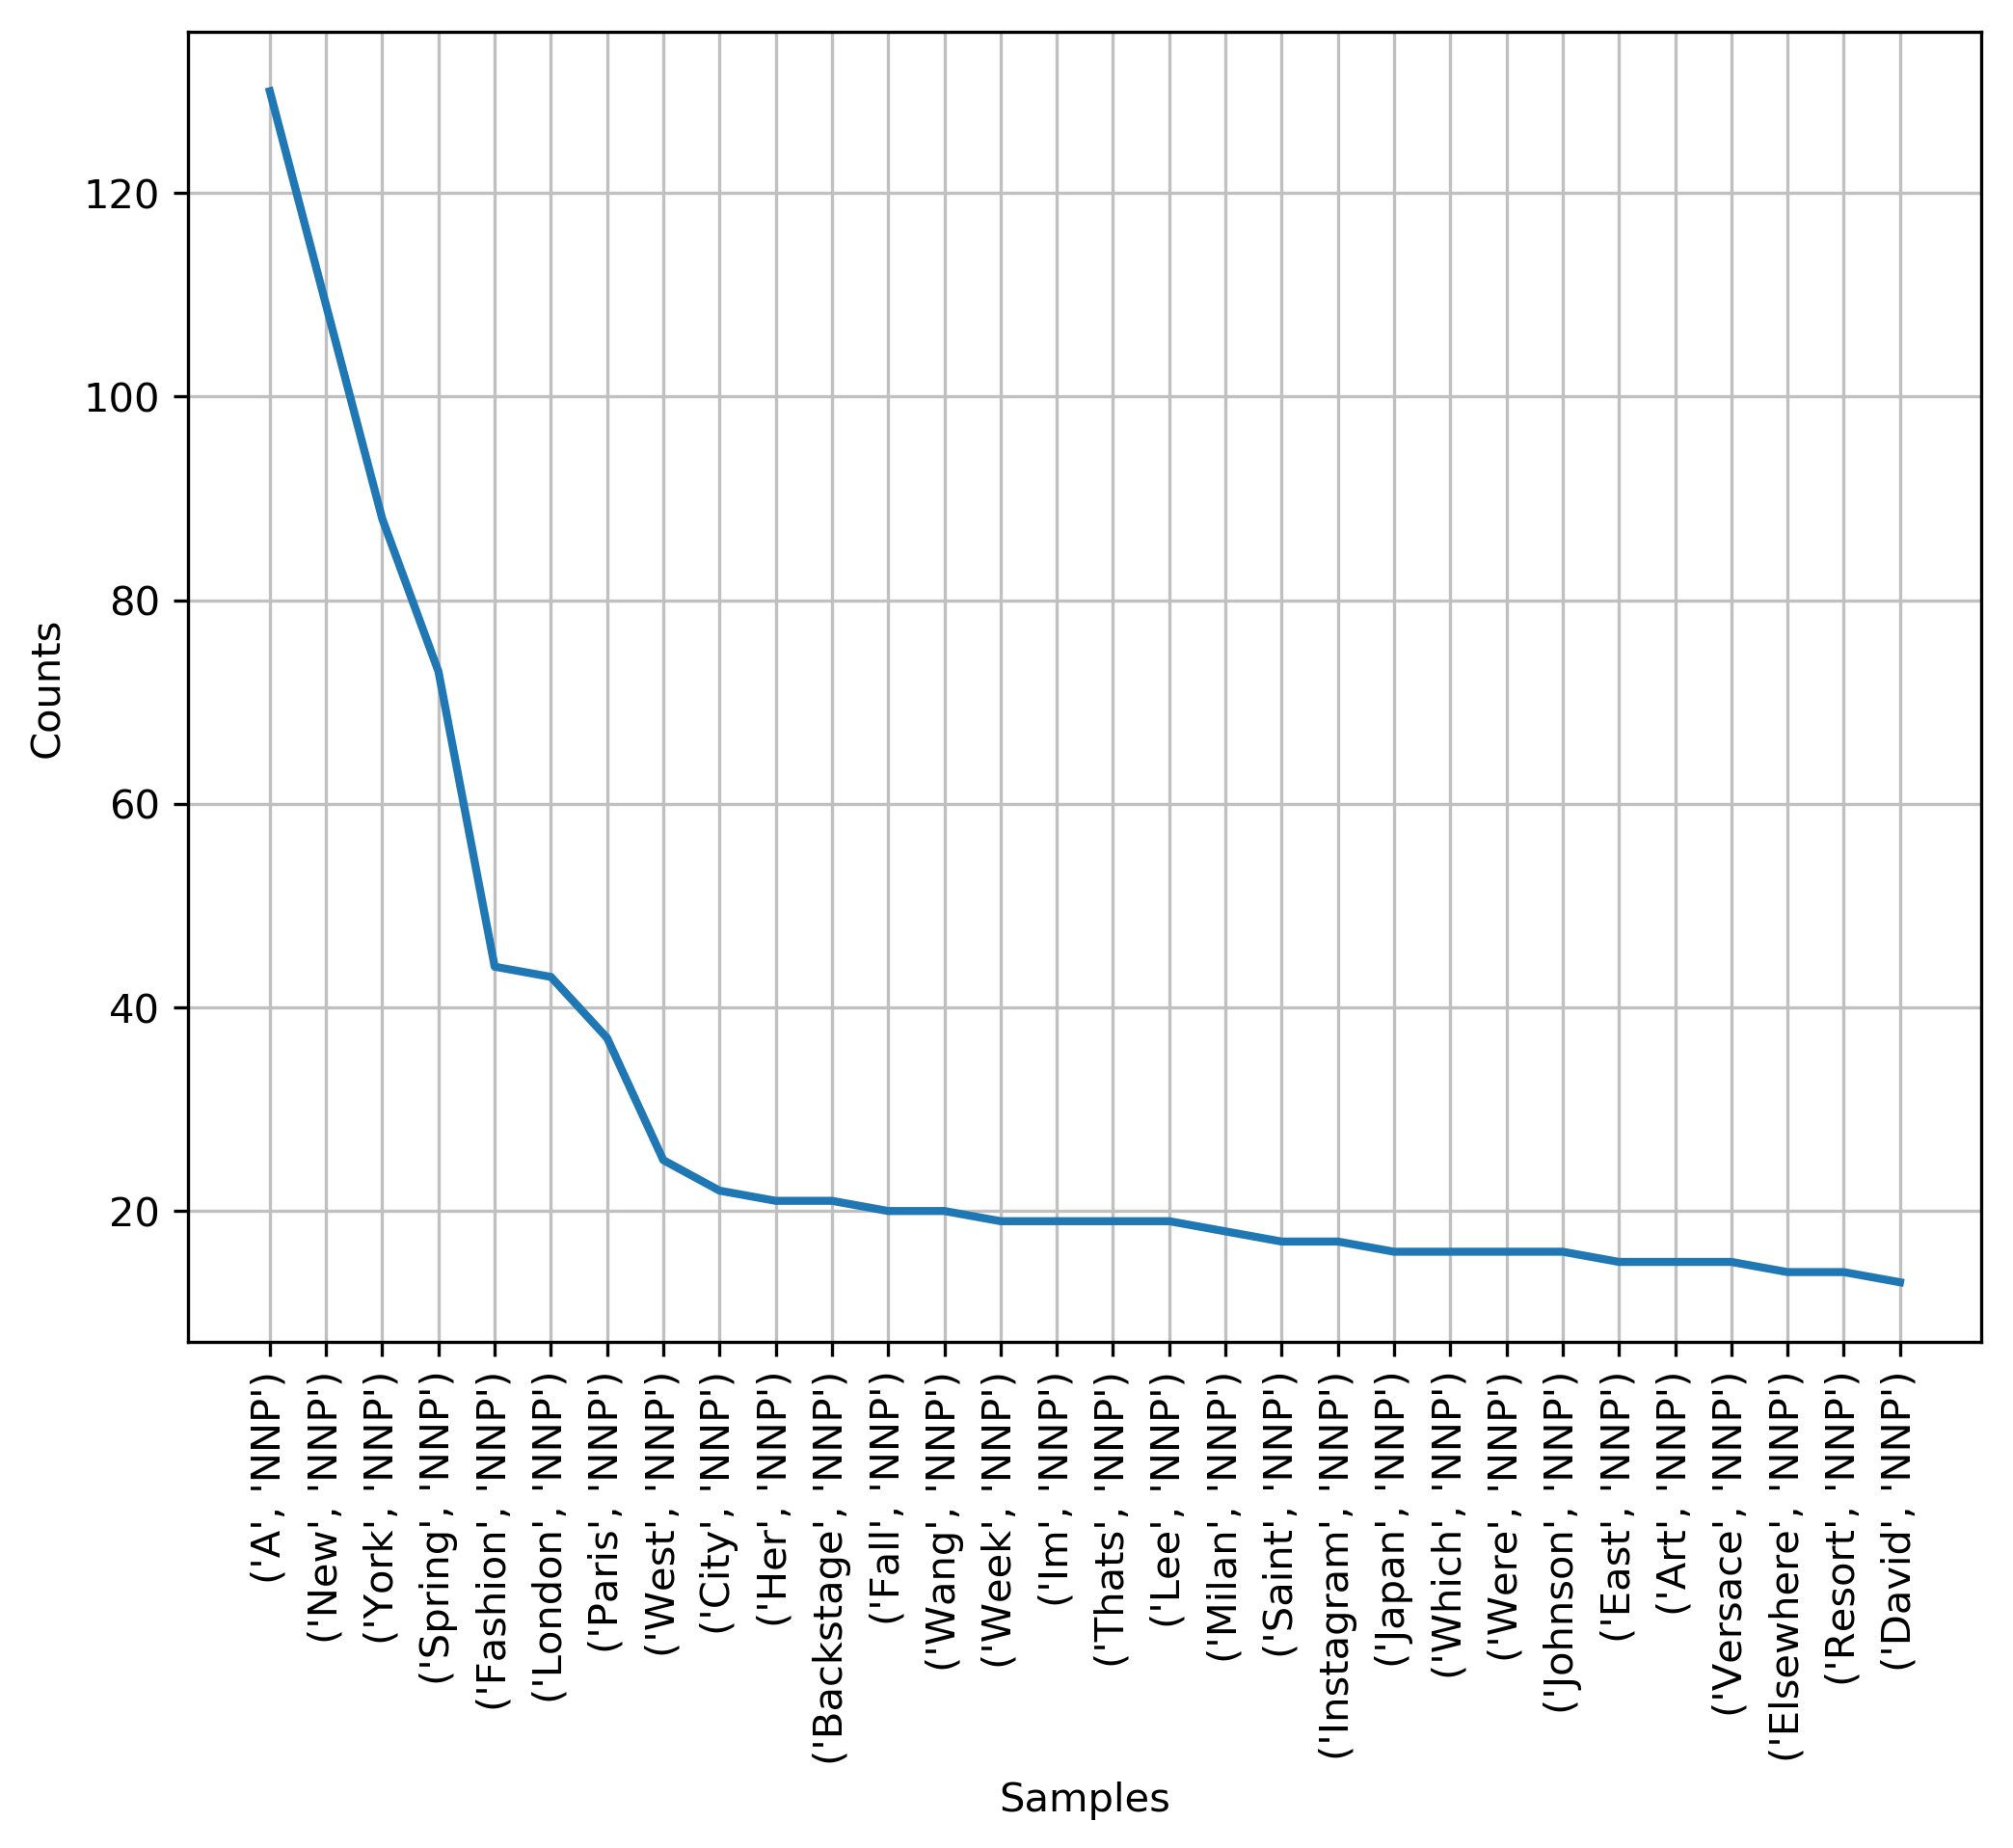

In [49]:
sns.set_style()
plt.figure(figsize=(8,6),dpi =300)
NNPtag_f.plot(30)
plt.show()